## Mall Customers Segmentation Data Analysis

Content:

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


Problem Statment:

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Observation:
  from the given data set we came to know that the data given is of Clustring Analysis where it comes under unsupervised learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# describe the stastictics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# describe the info of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No need to undergoes data preprocessing because there is no null value and all the columns where clean and processed already.

EDA --> Exploratory data analysis

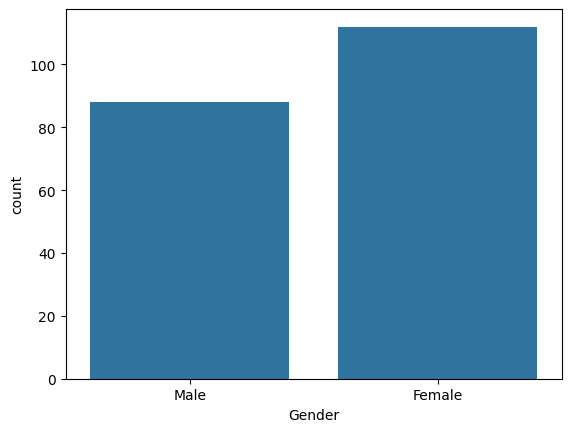

In [ ]:
# lets have visuals on categorical variables.

sns.countplot(data = df , x = 'Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

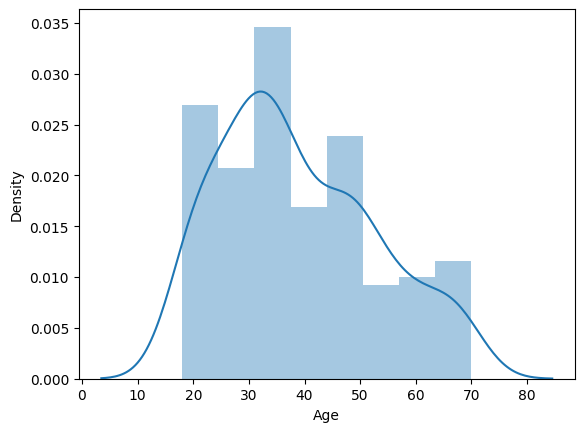

In [ ]:
# now we should apply visuals on 'age','Annual income','Spending Score'
sns.distplot(df['Age'])
plt.show()

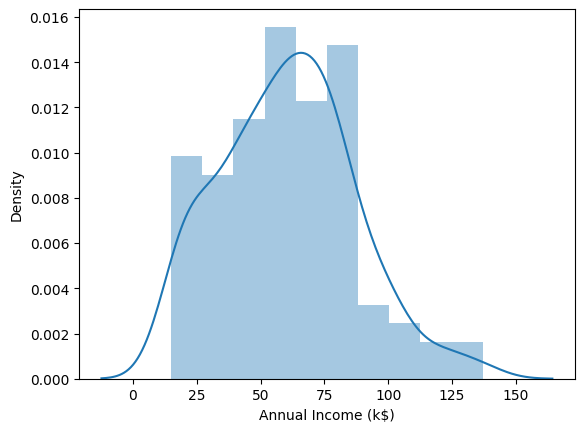

In [ ]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

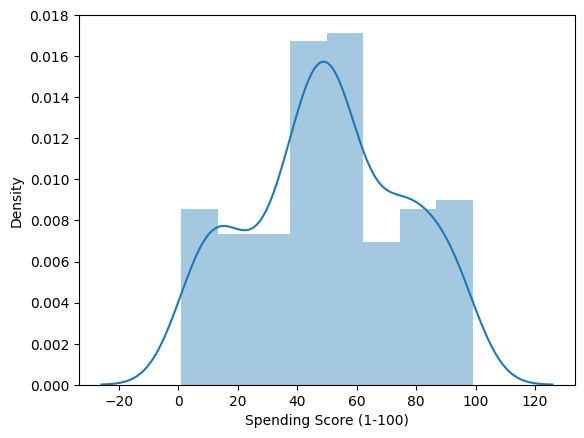

In [ ]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#Two-Dimensions Clustring

In [ ]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


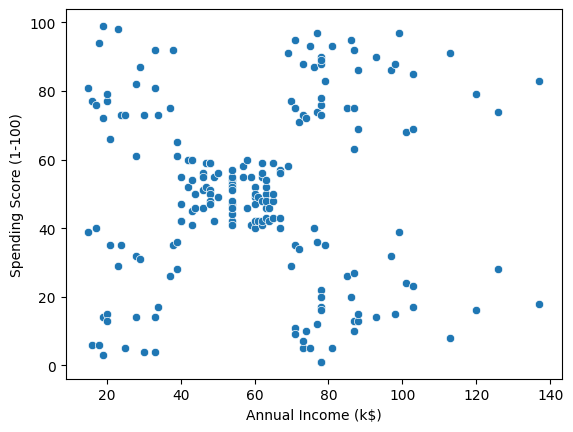

In [ ]:
# lets apply scatter plot with respect to  annual income and spending_score
sns.scatterplot(data = df1 , x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

#Applying unsupervised Learning

First we need to find the right number of clusters.
We can do this by calculating the inertia and then plotting it to find the elbow point.

In [ ]:
from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
  k_means = KMeans(n_clusters= i)
  k_means.fit(df1)
  errors.append(k_means.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

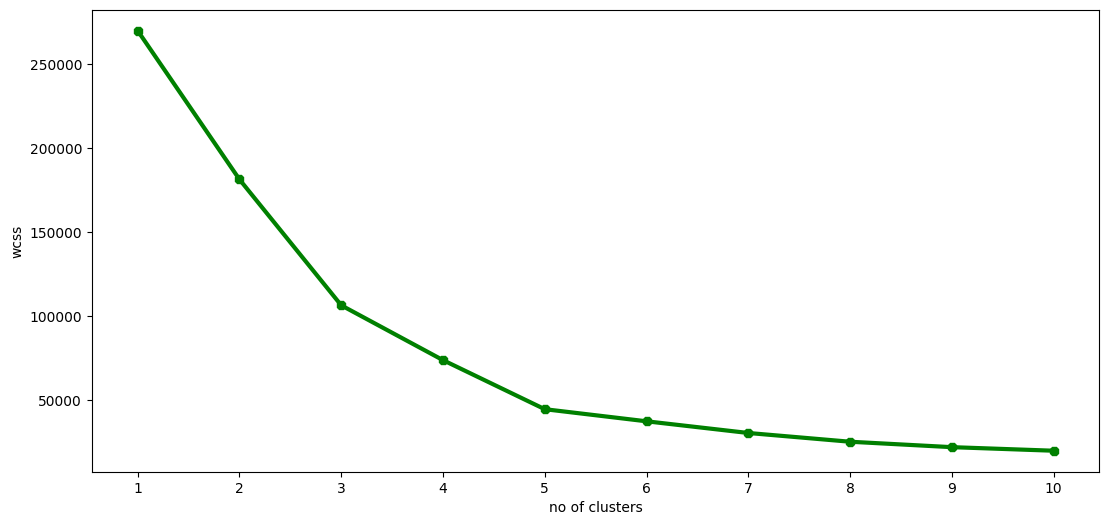

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth = 3 , color = 'green', marker = '8')
plt.xlabel("no of clusters")
plt.ylabel('wcss')
plt.xticks(np.arange(1,11))
plt.show

from the graph it is clearly evident that elbow point exist at n = 5

In [ ]:
km = KMeans(n_clusters= 5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


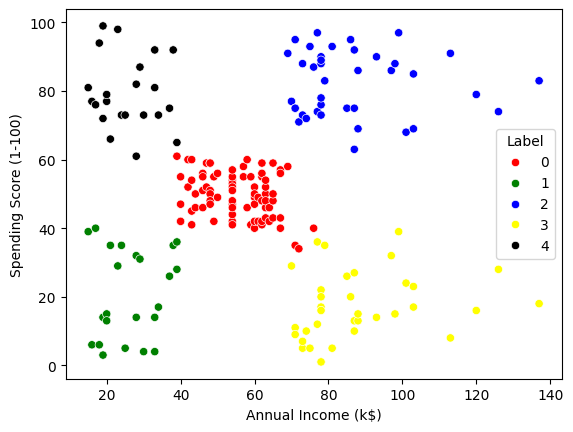

In [ ]:
sns.scatterplot(data = df1, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Label' , palette = ['red','green','blue','yellow','black'])
plt.show()

#Three dimensions Clustring

In [ ]:
df2 = df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [ ]:
errors = []
for i in range(1,11):
  k_means = KMeans(n_clusters= i)
  k_means.fit(df2)
  errors.append(k_means.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

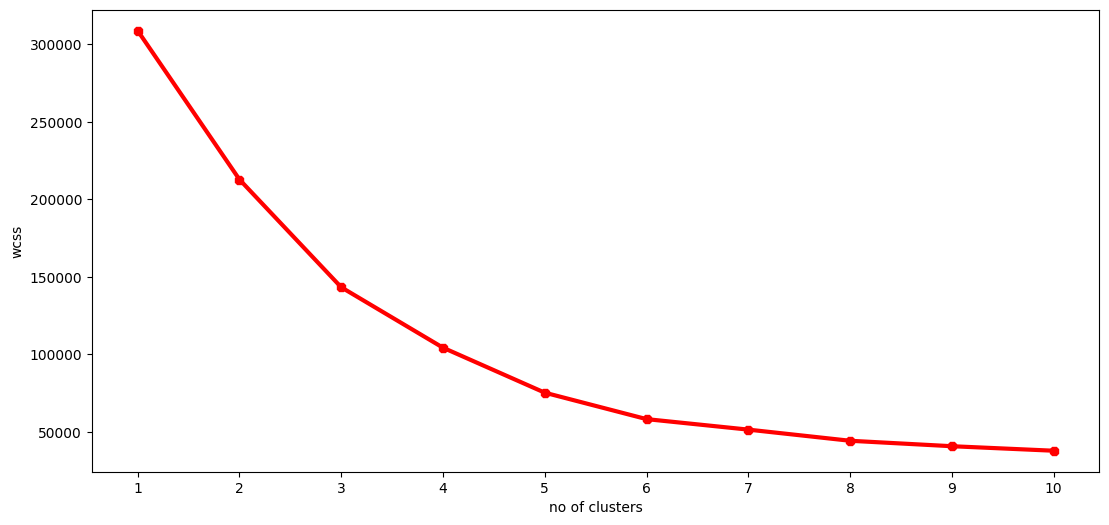

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth = 3 , color = 'red', marker = '8')
plt.xlabel("no of clusters")
plt.ylabel('wcss')
plt.xticks(np.arange(1,11))
plt.show

In [ ]:
km = KMeans(n_clusters= 5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,2
1,15,81,21,1
2,16,6,20,2
3,16,77,23,1
4,17,40,31,2


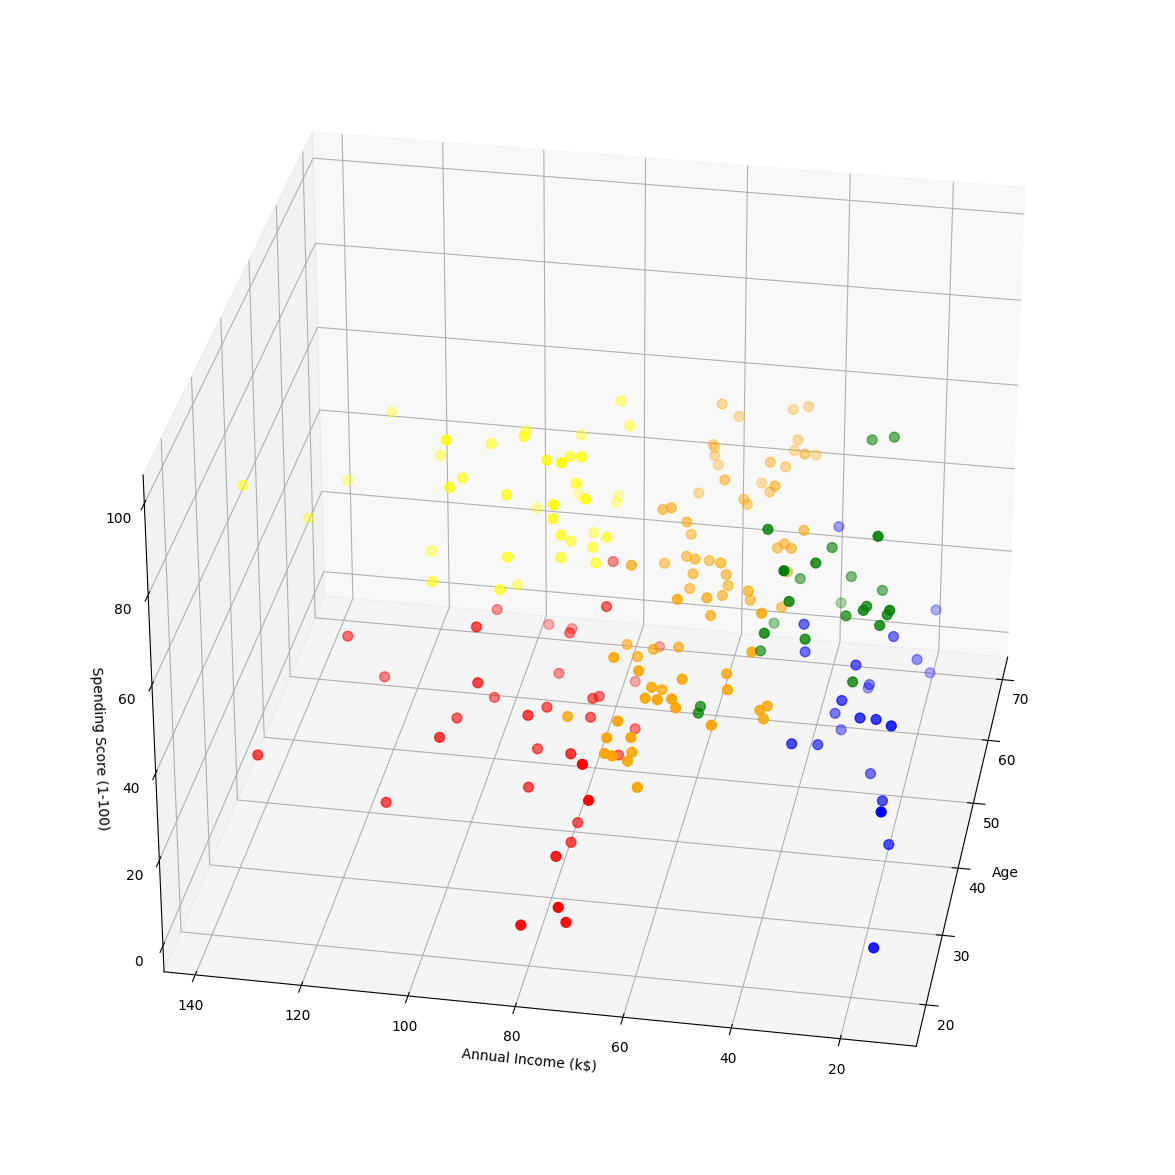

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0],c = 'red',s =50)
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1],c = 'green',s =50)
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2],c = 'blue',s =50)
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3],c = 'yellow',s =50)
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4],c = 'orange',s =50)
ax.view_init(30,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


Conclusions:

   Segmentation allows you to divide the customers into groups from the observation we came with two groups

   1. people with low value income have high spending score mall need to support this group.

   2.people with high value income have low spending score mall need to get them to buy more.